In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression class

In [ ]:
# X = [n x m]
# w = [m x 1]
# y = [n x 1]

In [5]:
class LinearRegression:
    def __init__(self, 
                 iter_num = 20, 
                 step = 0.1):
        self.iter_num = iter_num
        self.step = step
        

    def fit(self, X, y):

        # add constant column to take intercept into account
        X = self.__update_X(X)

        # y = [n x 1]
        y = y.reshape(-1, 1)
        
        self.n = X.shape[0] # number of rows
        self.m = X.shape[1] # number of features (including intercept)

        # set initial values of weights
        # w = [m x 1]
        self.w = np.random.rand(self.m, 1)

        # gradient descent
        loss = []
        for _ in range(self.iter_num):
            self.w = self.w - self.step * self.__gradient(X, y)
            loss.append(self.loss_func(np.dot(X, self.w), y))
        return loss

    
    def predict(self, X):
        # add constant column to take intercept into account
        X = self.__update_X(X)
        return np.dot(X, self.w)

    
    def score(self, y_pred, y_true):
        return self.loss_func(y_pred, y_true)

    
    def __gradient(self, X, y):
        # loss function derivative
        d_w = (1/self.n) * np.dot((np.dot(X, self.w) - y).T, X)
        return d_w.reshape((self.m, 1))

    @staticmethod
    def loss_func(y_pred, y_true):
        # Mean Squared Error
        y_pred = y_pred.reshape(-1, 1)
        y_true = y_true.reshape(-1, 1)
        assert y_pred.shape == y_true.shape
        
        return (1/(2*y_pred.shape[0])) * np.sum((y_pred - y_true)**2)

    @staticmethod
    def __update_X(X):
        return np.hstack((np.ones((X.shape[0], 1)), X))
 

## Test

In [3]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 20, 
                       n_features = 1,
                       noise = 2,
                       random_state = 42)

Text(0.5, 1.0, 'Training Loss')

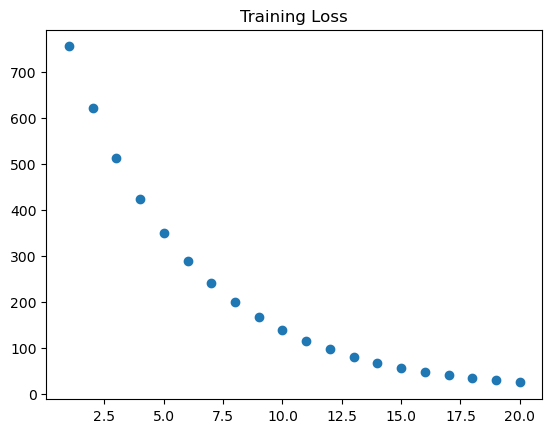

In [6]:
lr = LinearRegression()
history = lr.fit(X, y)

plt.scatter(range(1, len(history) + 1), history)
plt.title("Training Loss")

Text(0.5, 1.0, 'Linear regression on generated data')

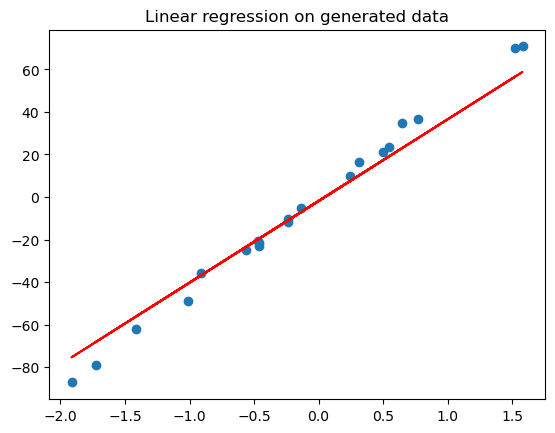

In [7]:
plt.scatter(X, y)
plt.plot(X, lr.w[0] + lr.w[1] * X, color = 'r', label = 'Regression line')
plt.title("Linear regression on generated data")

In [8]:
lr.score(lr.predict(X), y)

25.33108508206391